### Opdracht 3


## load imports

In [182]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# visualisations
import numpy as np
import matplotlib.pyplot as plt

## load data

In [183]:
with open("wiki.txt", "r") as file:
    wiki_text = [line.strip() for line in file if len(line.strip().split()) >= 10]

print(f"wiki_text len: {len(wiki_text)}")

with open("stopwoorden.txt", "r") as file:
    stopwoorden = [line.strip() for line in file if line]

wiki_text len: 62


## preprocess sentence

In [184]:
def preprocess_sentence(sentence):
    to_exclude = "/.%-,'\":;()[]0123456789"
    # Verwijder ongewenste tekens
    sentence = "".join([char if char not in to_exclude else " " for char in sentence])
    # Verwijder stopwoorden
    sentence = " ".join([word for word in sentence.split() if word.lower() not in stopwoorden])
    return sentence


In [185]:
corpus  = [preprocess_sentence(sentence) for sentence in wiki_text]
vocab = sorted(set(" ".join(corpus).split()))
print(f"vocab len: {len(vocab)}")
print(corpus)


vocab len: 732
['Kanker medisch Latijn neoplasma malignum kwaadaardig nieuwgevormd weefsel ziekte', 'cellen onbeheerst vermenigvuldigen', 'woekerende cellen omliggend weefsel richten schade invasieve groei infiltratie', 'woekerende cellen verspreiden plaatsen lichaam metastasering uitzaaiing lymfevaten lymfogene metastasering bloed hematogene metastasering verschillende lichaamsholten bijvoorbeeld buikholte', 'Nagenoeg medische specialismen behandeling kanker medisch specialisten oncologie radiotherapie kanker doodsoorzaak', 'Lezing Erasmus kanker Universiteit', 'kanker klassiek Latijnse cancer vanuit Romeinse encyclopedieschrijver Celsus', 'Kanker aandoening gekenmerkt onbeheerste groei abnormaal weefsel neoplasie aanhoudende ongecontroleerde celdeling Gezonde cellen lichaam prolifereren bepaalde organen vernieuwing herstel Tijdens celproliferatie cellen specifieke grootte afhankelijk functie proces celdifferentiatie deling differentiatie invloed extracellulaire cel afkomstige factore

## CBOW pairen maken

In [186]:
def create_pairs(corpus, w_size):
    X = []  # Context_word (input)
    y = []  # Target_word (output)
    
    for sentence in corpus:
        words = sentence.split()  # Verdeel de zin in woorden
        for index, target_word in enumerate(words):
            # Bepaal de context range (links en rechts van target_word)
            start = max(index - w_size, 0)
            end = min(index + w_size + 1, len(words))
            
            # Maak een lijst met alle woorden in het window, behalve target_word zelf
            context_words = [words[i] for i in range(start, end) if i != index]
            
            # Voeg de context en target toe aan de lijsten
            X.append(" ".join(context_words))  # Combineer contextwoorden tot een string
            y.append(target_word)              # Doelwoord
    
    return X, y

In [187]:
# Roep de functie aan met window size 2
X, y = create_pairs(corpus, w_size=2)

# Resultaat tonen
for context, target in zip(X[:5], y[:5]):
    print(f"Context: {context} -> Target: {target}")


Context: medisch Latijn -> Target: Kanker
Context: Kanker Latijn neoplasma -> Target: medisch
Context: Kanker medisch neoplasma malignum -> Target: Latijn
Context: medisch Latijn malignum kwaadaardig -> Target: neoplasma
Context: Latijn neoplasma kwaadaardig nieuwgevormd -> Target: malignum


In [188]:
# Assuming create_pairs function works and provides X (contexts) and y (targets)
# For example, you get these contexts from your create_pairs function
X, y = create_pairs(corpus, w_size=2)  # Run create_pairs function with your corpus

# Initialize CountVectorizer
vectorizer = CountVectorizer(max_features=len(vocab), tokenizer=lambda x: x.split())

# Transform the context sentences (X) into vectors
X_sentences = vectorizer.fit_transform(X).toarray()

c:\Users\isabe\anaconda3\envs\modelleren_van_kanker\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [189]:
# Now let's inspect the first 5 contexts
example_contexts = X[:5]  # First 5 context sentences
example_vectors = vectorizer.transform(example_contexts).toarray()

# Display the vectors and corresponding contexts
for i, (context, vector) in enumerate(zip(example_contexts, example_vectors)):
    print(f"Context {i+1}: '{context}'")
    print(f"Vector: {vector}")
    print()

# Display word-to-index mapping from the vectorizer
vocab_dict = vectorizer.vocabulary_
print("Word-to-index mapping:", vocab_dict)


Context 1: 'medisch Latijn'
Vector: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

### training 


In [190]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_sentences, y, test_size=0.2, random_state=42)

# Create the MLPClassifier model with 100 hidden nodes in one hidden layer
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

### model evaluation

In [191]:
# Evaluate the model (you can also use other metrics like precision, recall, etc.)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.0364


In [192]:
print(f"Vocabulary size: {len(vocab)}")
print(f"Input-hidden weights shape: {input_hidden_weights.shape}")


Vocabulary size: 732
Input-hidden weights shape: (710, 100)


### de embedding layer


In [202]:
# Truncate the vocabulary to match the number of input features in the model
vocab = vocab[:710]  # Limit the vocabulary to 710 words

# Create a word vector for each word in the truncated vocabulary
word_vector = {}
for i, word in enumerate(vocab):
    word_vector[word] = input_hidden_weights[i]

# Normalize the word vectors using np.linalg.norm
for word in word_vector:
    word_vector[word] = word_vector[word] / np.linalg.norm(word_vector[word])

# Access the vector for the word 'kanker'
print(word_vector.get('kanker', 'Word not found'))

[ 0.10956539 -0.07946736  0.1377618   0.14493659 -0.08105228  0.01772864
  0.11593074 -0.10724518 -0.05938248  0.1560662  -0.13240833 -0.09596299
 -0.02706644  0.04008441  0.13205117  0.00826658  0.09534573  0.03417556
  0.13093709  0.10075713 -0.06682158  0.08380116  0.02710261 -0.11186616
  0.0783161  -0.08775378  0.17089674 -0.14697372  0.12826078 -0.01479808
 -0.08218015  0.09479313  0.10053961 -0.02370281  0.09190648 -0.04208673
  0.1232011  -0.05434171 -0.00509947 -0.12763759  0.06211195  0.07427741
  0.09639599  0.05949166  0.01257579 -0.06744465  0.11853469  0.04639414
 -0.03228962  0.05896062  0.14294007 -0.10825619  0.1636193   0.10505456
  0.11079068  0.10237863  0.17216085  0.13228486  0.05105281  0.14313077
  0.12576418  0.12577516  0.13715705 -0.1220379  -0.08786579  0.08564917
 -0.04368337  0.0888945   0.1310837   0.13895999  0.10557254 -0.15139428
  0.01007727  0.1306583  -0.12269934 -0.04467616  0.03909816  0.08250259
 -0.16454424  0.11119819 -0.09849736 -0.11025838 -0

### visualisations

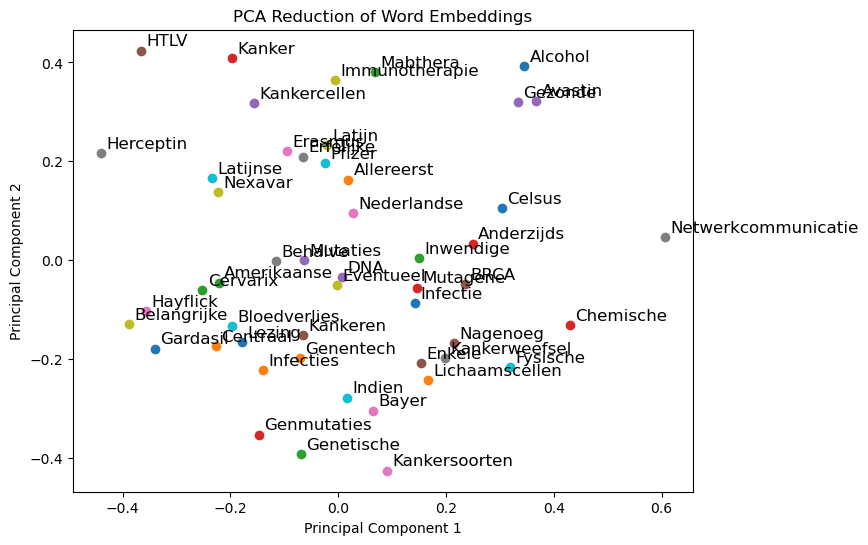

In [204]:
def compute_pca(X, n_components):
    # Normaliseer de data (haal gemiddelde af)
    X_normalized = X - np.mean(X, axis=0)
    
    # Bereken de covariantiematrix
    covariance_matrix = np.cov(X_normalized, rowvar=False)
    
    # Bereken de eigenwaarden en eigenvectoren
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    
    # Sorteer de eigenvectoren op basis van eigenwaarden (van hoog naar laag)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    top_eigenvectors = eigenvectors[:, sorted_indices[:n_components]]
    
    # Projecteer de data op de belangrijkste eigenvectoren
    reduced_data = np.dot(X_normalized, top_eigenvectors)
    
    return reduced_data


# List of words from the vocabulary (choose a subset for visualization)
words = list(word_vector.keys())[:50]  # take first 100 words

# Get the embeddings for the words in the vocab (use word_vector dictionary)
embeddings = np.array([word_vector[word] for word in words])

# Perform PCA to reduce to 2 dimensions
reduced_embeddings = compute_pca(embeddings, n_components=2)

# Plot the words in 2D space
plt.figure(figsize=(8, 6))
for i, word in enumerate(words):
    x, y = reduced_embeddings[i]
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, word, fontsize=12)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Reduction of Word Embeddings')
plt.show()

